# Ordinary Least Squares in Python

Linear Regression, also called Ordinary Least-Squares (OLS) Regression, is probably the most commonly used technique in Statistical Learning. It is also the oldest, dating back to the eighteenth century and the work of [Carl Friedrich Gauss](http://en.wikipedia.org/Carl_Freidrich_Gauss) and [Adrien-Marie Legendre](http://en.wikipedia.org/Adrien-Marie_Legendre). It is also one of the easier and more intuitive techniques to understand, and it provides a good basis for learning more advanced concepts and techniques. This posting explains how to perform linear regression using the [statsmodels](http://statsmodels.sourceforge.net/) Python package, we will discuss the single variable case and defer multiple regression to a future post.

<em>This is part of a series of blog posts to show how to do common statistical learning techniques in Python. We provide only a small amount of background on the concepts and techniques we cover, so if you'd like a more thorough explanation check out [Introduction to Statistical Learning](https://www.statlearning.com) or sign up for the [free online course](http://online.stanford.edu/course/statistical-learning-winter-2014) by the authors here. If you are just here to learn how to do it in Python [skip](#skip-to-python) directly to the examples below.</em>

## Statsmodels

Statsmodel is a Python library designed for more statistically-oriented approaches to data analysis, with an emphasis on econometric analyses. It integrates well with the [pandas](http://pandas.pydata.org) and [numpy](http://numpy.org) libraries we covered in a previous post. It also has built in support for many of the statistical tests to check the quality of the fit and a dedicated set of plotting functions to visualize and diagnose the fit. [Scikit-learn](http://scikit-learn.org/stable/) also has support for linear regression, including many forms of regularized regression lacking in statsmodels, but it lacks the rich set of statistical tests and diagnostics that have been developed for linear models.

## Linear Regression and Ordinary Least Squares

Linear regression one of the simplest and most commonly used modeling techniques. It makes very strong assumptions about the relationship between the predictor variables (the X) and the response (the Y). It assumes that this relationship takes the form:

$y = \beta_0 + \beta_1 * x$

Ordinary Least Squares is the simplest and most common estimator in which the two $\beta$'s are chosen to minimize the square of the distance between the predicted values and the actual values. Even though this model is quite rigid and often does not reflect the true relationship, this still remains a popular approach for several reasons. For one, it is computationally cheap to calculate the coefficients. It is also easier to interpret than more sophisticated models, and in situations where the goal is understanding a simple model in detail, rather than estimating the response well, they can provide insight into what the model captures. Finally, in situations where there is a lot of noise, it may be hard to find the true functional form, so a constrained model can perform quite well compared to a complex model which is more affected by noise.

The resulting model is represented as follows:

$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 * x$

Here the hats on the variables represent the fact that they are estimated from the data we have available. The $\hat{\beta}$'s are termed the parameters of the model or the coefficients. $\hat{\beta}_0$ is called the *constant term* or the *intercept*.

## Ordinary Least Squares Using Statsmodels

The statsmodels package provides several different classes that provide different options for linear regression. Getting started with linear regression is quite straightforward with the OLS module.

To start with we load the [Longley dataset](http://stat.ethz.ch/R-manual/R-patched/library/datasets/html/longley.html) of US macroeconomic data from the [Rdatasets](http://vincentarelbundock.github.io/Rdatasets/) website.

In [2]:
# load numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# load statsmodels as alias ``sm``
import statsmodels.api as sm

# load the longley dataset into a pandas data frame - first column (year) used as row labels
df = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/datasets/longley.csv', index_col=0)
df.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
rownames,,,,,,,
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


We will use the variable Total Derived Employment (``'Employed'``) as our response ``y`` and Gross National Product (``'GNP'``) as our predictor ``X``.

We take the single response variable and store it separately. We also add a constant term so that we fit the intercept of our linear model.

In [3]:
y = df["Employed"]  # response
X = df["GNP"]  # predictor
X = sm.add_constant(X)  # Adds a constant term to the predictor
X.head()

,const,GNP
rownames,,
1947,1.0,234.289
1948,1.0,259.426
1949,1.0,258.054
1950,1.0,284.599
1951,1.0,328.975


Now we perform the regression of the predictor on the response, using the ``sm.OLS`` class and and its initialization ``OLS(y, X)`` method. This method takes as an input two array-like objects: ``X`` and ``y``. In general, ``X`` will either be a numpy array or a pandas data frame with shape ``(n, p)`` where ``n`` is the number of data points and ``p`` is the number of predictors. ``y`` is either a one-dimensional numpy array or a pandas series of length ``n``.

In [4]:
est = sm.OLS(y, X)

We then need to fit the model by calling the OLS object's ``fit()`` method. Ignore the warning about the kurtosis test if it appears, we have only 16 examples in our dataset and the test of the kurtosis is valid only if there are more than 20 examples.

In [5]:
est = est.fit()
est.summary()

/home/ebezerra/anaconda3/envs/gcc1625/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Employed   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     415.1
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           8.36e-12
Time:                        09:33:09   Log-Likelihood:                -14.904
No. Observations:                  16   AIC:                             33.81
Df Residuals:                      14   BIC:                             35.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.8436      0.681     76.087      0.000      50.382      53.305
GNP            0.0348      0.002     20.374      0.000       0.031       0.038
==============================================================================
Omnibus:                        1.925   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.215
Skew:                           0.664   Prob(JB):                        0.545
Kurtosis:                       2.759   Cond. No.                     1.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

After visualizing the relationship we will explain the summary. First, we need the coefficients of the fit.

In [6]:
est.params

const    51.843590
GNP       0.034752
dtype: float64

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


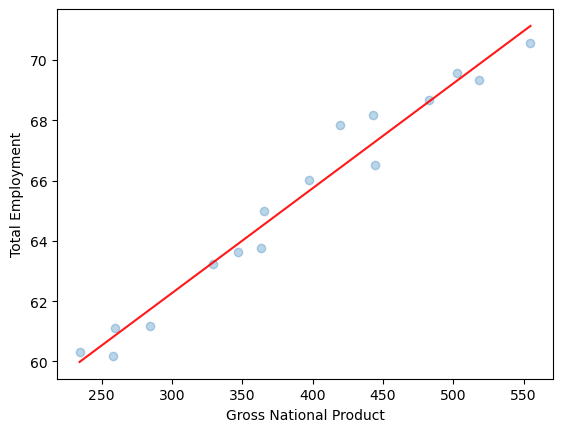

In [8]:
# Make sure that graphics appear inline in the iPython notebook
%pylab inline

# We pick 100 hundred points equally spaced from the min to the max
X_prime = np.linspace(X.GNP.min(), X.GNP.max(), 100)[:, np.newaxis]
X_prime = sm.add_constant(X_prime)  # add constant as we did before

# Now we calculate the predicted values
y_hat = est.predict(X_prime)

plt.scatter(X.GNP, y, alpha=0.3)  # Plot the raw data
plt.xlabel("Gross National Product")
plt.ylabel("Total Employment")
plt.plot(X_prime[:, 1], y_hat, 'r', alpha=0.9)  # Add the regression line, colored in red

Statsmodels also provides a formulaic interface that will be familiar to users of R. Note that this requires the use of a different api to statsmodels, and the class is now called ``ols`` rather than ``OLS``. The argument ``formula`` allows you to specify the response and the predictors using the column names of the input data frame ``data``.

In [9]:
# import formula api as alias smf
import statsmodels.formula.api as smf

# formula: response ~ predictors
est = smf.ols(formula='Employed ~ GNP', data=df).fit()
est.summary()

/home/ebezerra/anaconda3/envs/gcc1625/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Employed   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     415.1
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           8.36e-12
Time:                        09:35:46   Log-Likelihood:                -14.904
No. Observations:                  16   AIC:                             33.81
Df Residuals:                      14   BIC:                             35.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.8436      0.681     76.087      0.000      50.382      53.305
GNP            0.0348      0.002     20.374      0.000       0.031       0.038
==============================================================================
Omnibus:                        1.925   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.215
Skew:                           0.664   Prob(JB):                        0.545
Kurtosis:                       2.759   Cond. No.                     1.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This summary provides quite a lot of information about the fit. The pats of the table we think are the most important are bolded in the description below.

The left part of the first table provides basic information about the model fit:

<table>
<thead>
<tr>
<th>Element</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td>Dep. Variable</td>
<td>Which variable is the response in the model</td>
</tr>
<tr>
<td>Model</td>
<td>What model you are using in the fit</td>
</tr>
<tr>
<td>Method</td>
<td>How the parameters of the model were calculated</td>
</tr>
<tr>
<td>No. Observations</td>
<td>The number of observations (examples)</td>
</tr>
<tr>
<td>DF Residuals</td>
<td>Degrees of freedom of the residuals. Number of observations - number of parameters</td>
</tr>
<tr>
<td>DF Model</td>
<td>Number of parameters in the model (not including the constant term if present)</td>
</tr>
</tbody>
</table>

The right part of the first table shows the goodness of fit

<table>
<thead>
<tr>
<th>Element</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td>**R-squared**</td>
<td>The [coefficient of determination](http://en.wikipedia.org/wiki/Coefficient_of_determination). A statistical measure of how well the regression line approximates the real data points</td>
</tr>
<tr>
<td>**Adj. R-squared**</td>
<td>The above value adjusted based on the number of observations and the degrees-of-freedom of the residuals</td>
</tr>
<tr>
<td>F-statistic</td>
<td>A measure how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals</td>
</tr>
<tr>
<td>Prob (F-statistic)</td>
<td>The probability that you would get the above statistic, given the null hypothesis that they are unrelated</td>
</tr>
<tr>
<td>Log-likelihood</td>
<td>The log of the likelihood function.</td>
</tr>
<tr>
<td>AIC</td>
<td>The [Akaike Information Criterion](http://en.wikipedia.org/wiki/Akaike_information_criterion). Adjusts the log-likelihood based on the number of observations and the complexity of the model.</td>
</tr>
<tr>
<td>BIC</td>
<td>The [Bayesian Information Criterion](http://en.wikipedia.org/wiki/Bayesian_information_criterion). Similar to the AIC, but has a higher penalty for models with more parameters.</td>
</tr>
</tbody>
</table>

The second table reports for each of the coefficients

<table>
<thead>
<tr>
<th></th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td></td>
<td>The name of the term in the model</td>
</tr>
<tr>
<td>coef</td>
<td>The estimated value of the coefficient</td>
</tr>
<tr>
<td>std err</td>
<td>The basic standard error of the estimate of the coefficient. More sophisticated errors are also available.</td>
</tr>
<tr>
<td>t</td>
<td>The t-statistic value. This is a measure of how statistically significant the coefficient is.</td>
</tr>
<tr>
<td><strong>P &gt; |t|</strong></td>
<td>P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.</td>
</tr>
<tr>
<td>**[95.0% Conf. Interval]**</td>
<td>The lower and upper values of the 95% confidence interval</td>
</tr>
</tbody>
</table>

Finally, there are several statistical tests to assess the distribution of the residuals

<table>
<thead>
<tr>
<th>Element</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td>Skewness</td>
<td>A measure of the symmetry of the data about the mean. Normally-distributed errors should be symmetrically distributed about the mean (equal amounts above and below the line).</td>
</tr>
<tr>
<td>Kurtosis</td>
<td>A measure of the shape of the distribution. Compares the amount of data close to the mean with those far away from the mean (in the tails).</td>
</tr>
<tr>
<td>Omnibus</td>
<td>D'Angostino's test. It provides a combined statistical test for the presence of skewness and kurtosis.</td>
</tr>
<tr>
<td>Prob(Omnibus)</td>
<td>The above statistic turned into a probability</td>
</tr>
<tr>
<td>Jarque-Bera</td>
<td>A different test of the skewness and kurtosis</td>
</tr>
<tr>
<td>Prob (JB)</td>
<td>The above statistic turned into a probability</td>
</tr>
<tr>
<td>Durbin-Watson</td>
<td>A test for the presence of autocorrelation (that the errors are not independent.) Often important in time-series analysis</td>
</tr>
<tr>
<td>Cond. No</td>
<td>A test for multicollinearity (if in a fit with multiple parameters, the parameters are related with each other).</td>
</tr>
</tbody>
</table>


As a final note, if you don't want to include a constant term in your model, you can exclude it using the minus operator.

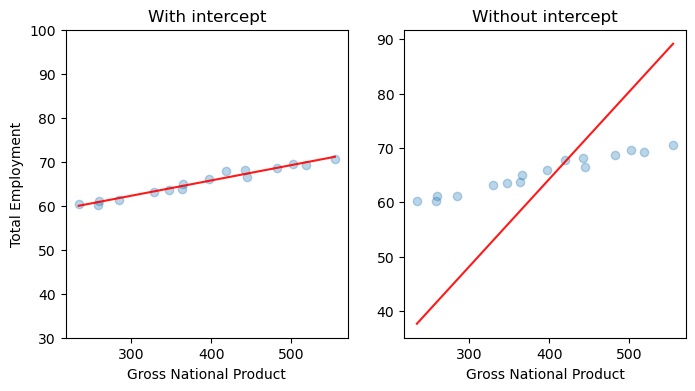

In [10]:
# Fit the no-intercept model
est_no_int = smf.ols(formula='Employed ~ GNP - 1', data=df).fit()

# We pick 100 hundred points equally spaced from the min to the max
X_prime_1 = pd.DataFrame({'GNP': np.linspace(X.GNP.min(), X.GNP.max(), 100)})
X_prime_1 = sm.add_constant(X_prime_1)  # add constant as we did before

y_hat_int = est.predict(X_prime_1)
y_hat_no_int = est_no_int.predict(X_prime_1)

fig = plt.figure(figsize=(8,4))
splt = plt.subplot(121)

splt.scatter(X.GNP, y, alpha=0.3)  # Plot the raw data
plt.ylim(30, 100)  # Set the y-axis to be the same
plt.xlabel("Gross National Product")
plt.ylabel("Total Employment")
plt.title("With intercept")
splt.plot(X_prime[:, 1], y_hat_int, 'r', alpha=0.9)  # Add the regression line, colored in red

splt = plt.subplot(122)
splt.scatter(X.GNP, y, alpha=0.3)  # Plot the raw data
plt.xlabel("Gross National Product")
plt.title("Without intercept")
splt.plot(X_prime[:, 1], y_hat_no_int, 'r', alpha=0.9)  # Add the regression line, colored in red

But notice that this may not be the best idea... :)

## Correlation and Causation

Clearly there is a relationship or correlation between GNP and total employment. So does that mean a change in GNP cause a change in total employment? Or does a change in total employment cause a change in GNP? This is a subject we will explore in the next post.